In [1]:
import tensorflow as tf

print(tf.__version__)

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

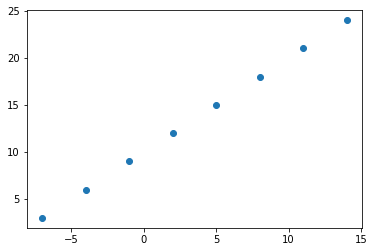

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regression input shapes and output shapes

In [5]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
house_info.shape

TensorShape([3])

In [7]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

## Steps in modelling with Tensorflow

In [9]:
# set random seed
tf.random.set_seed(42)

# create a model using the sequential api
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 14.2707 - mae: 14.2707
Epoch 2/5
1/1 [==============================] - 0s 81ms/step - loss: 14.1382 - mae: 14.1382
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 14.0057 - mae: 14.0057
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 13.8732 - mae: 13.8732
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 13.7407 - mae: 13.7407


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 413ms/step


array([[-0.71826345]], dtype=float32)

## Improving the model

In [12]:
# Create a model (same as above)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

# Compile model (same as above)
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.0259 - mae: 13.0259
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3003 - mae: 12.3003
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5705 - mae: 11.5705
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8335 - mae: 10.8335
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0861 - mae: 10.0861
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3250 - mae: 9.3250
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5472 - mae: 8.5472
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7501 - mae: 7.7501
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9316 - mae: 6.9316
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 6.7294 - mae: 6.7294
Epoch 11/100
1/1 [==============================] - 0s 16ms/s

In [13]:
# try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 248ms/step


array([[27.390566]], dtype=float32)

## Evaluating a model

In [14]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since y = X + 10, we could make the labels like so:

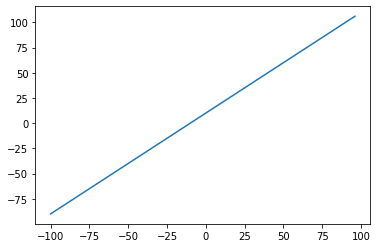

In [16]:
plt.plot(X,y)

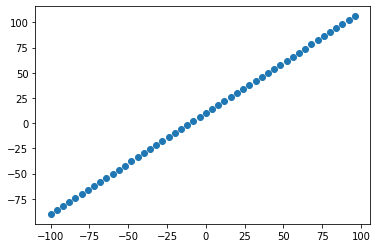

In [17]:
plt.scatter(X,y)

### Split data into training/test set

In [18]:
# Check how many samples we have
len(X)

50

In [19]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

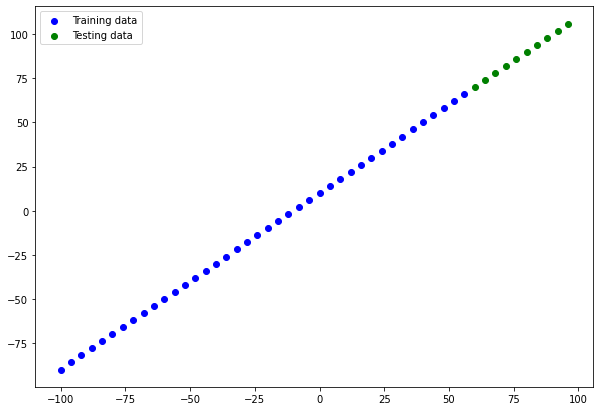

In [20]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [23]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

Ahh, the cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [24]:
from os import name
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer') # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [25]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 48.1058 - mae: 48.1058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 35.2159 - mae: 35.2159
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.2434 - mae: 37.2434
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 14.8729 - mae: 14.8729
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 21.5571 - mae: 21.5571
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.0663 - mae: 8.0663
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0931 - mae: 13.0931
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2983 - mae: 11.2983
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 42.1738 - mae: 42.1738
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 29.3510 - mae: 29.3510
Epoch 11/100
2/2 [==============================] - 0s 6ms/

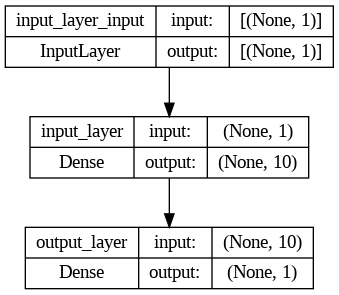

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing the predictions

In [28]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


In [29]:
# View the predictions
y_preds

array([[ 76.93465 ],
       [ 81.95096 ],
       [ 86.96727 ],
       [ 91.983574],
       [ 96.99988 ],
       [102.01619 ],
       [107.0325  ],
       [112.04881 ],
       [117.06511 ],
       [122.08142 ]], dtype=float32)

In [30]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

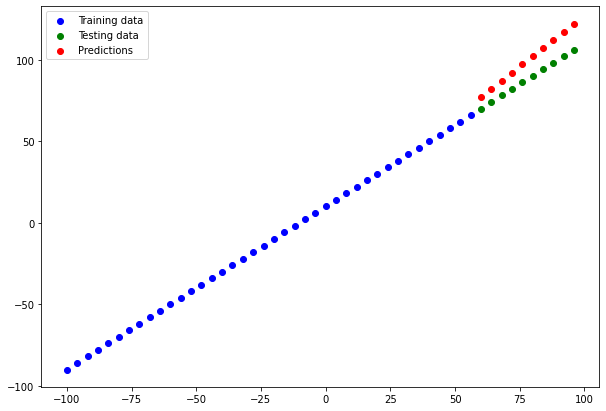

In [31]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions

In [32]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 11.5080 - mae: 11.5080


[11.508035659790039, 11.508035659790039]

In [33]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.039212, 10.819616, 10.      , 10.396715, 11.999951, 14.812952,
       19.032501, 24.048813, 29.06511 , 34.08142 ], dtype=float32)>

In [34]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [35]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[ 76.93465 ],
       [ 81.95096 ],
       [ 86.96727 ],
       [ 91.983574],
       [ 96.99988 ],
       [102.01619 ],
       [107.0325  ],
       [112.04881 ],
       [117.06511 ],
       [122.08142 ]], dtype=float32)

In [36]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [37]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [38]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [39]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 76.93465 ,  81.95096 ,  86.96727 ,  91.983574,  96.99988 ,
        102.01619 , 107.0325  , 112.04881 , 117.06511 , 122.08142 ],
       dtype=float32))

In [40]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.508036>

In [41]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=140.95616>

In [42]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=11.508036041259766>

In [43]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

### Running experiments to improve a model

Build model_1

In [46]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 30.5423 - mae: 30.5423
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7832 - mae: 9.7832
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.7675 - mae: 10.7675
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4943 - mae: 9.4943
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3941 - mae: 10.3941
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.6284 - mae: 9.6284
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.7350 - mae: 8.7350
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0513 - mae: 9.0513
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.1771 - mae: 19.1771
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3458 - mae: 10.3458
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 41ms/step


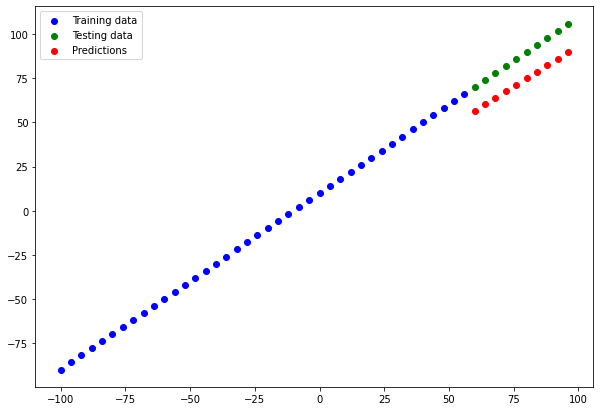

In [47]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(14.8943815, 222.67781)

Build model_2

In [52]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 39.8217 - mse: 2372.6558
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.1715 - mse: 749.8820
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.2901 - mse: 1286.3783
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.1080 - mse: 1171.2494
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6876 - mse: 228.3297
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0033 - mse: 133.7098
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9945 - mse: 180.6362
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8387 - mse: 131.6891
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 37.3816 - mse: 2149.1309
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.0675 - mse: 881.1561
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 49ms/step


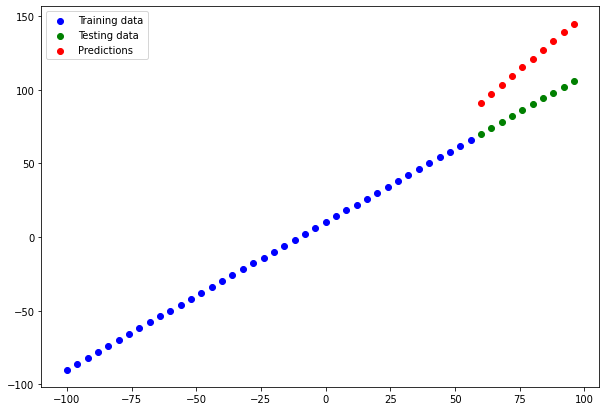

In [53]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [54]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(30.042715, 934.1947)

Build model_3

In [55]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 47ms/step


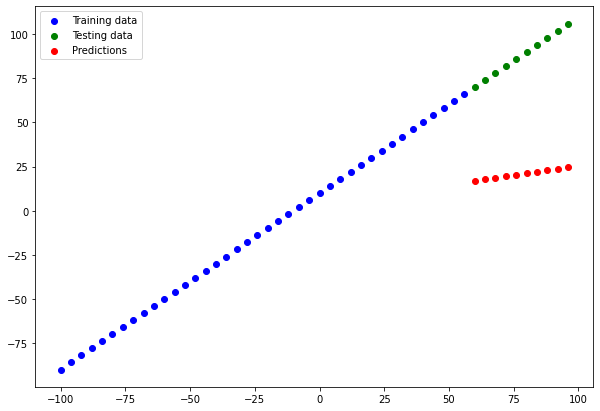

In [56]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [57]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.26662, 4607.7646)

Comparing results

In [60]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [61]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.894382,222.677811
1,model_2,30.042715,934.194702
2,model_3,67.266617,4607.764648


Saving a model

In [62]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [63]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [64]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [65]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


Loading a model

In [66]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 57ms/step


True

In [68]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 46ms/step


True

Downloading a model (from Google Colab)

In [70]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### A larger example

In [73]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read in the insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [75]:
# Check out the insurance dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
# Turn all categories into numbers
df_one_hot = pd.get_dummies(df)
df_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [80]:
# Create X & y values
X = df_one_hot.drop("charges", axis=1)
y = df_one_hot["charges"]

In [81]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [82]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = Sequential([
  Dense(10),
  Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8545.0986 - mae: 8545.0986
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7876.7383 - mae: 7876.7383
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7549.7563 - mae: 7549.7563
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7775.4478 - mae: 7775.4478
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7648.7227 - mae: 7648.7227
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7614.0425 - mae: 7614.0425
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7552.9385 - mae: 7552.9385
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7795.3374 - mae: 7795.3374
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7490.6699 - mae: 7490.6699
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7671.8989 - mae: 7671.8989

In [84]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5829.7671 - mae: 5829.7671


[5829.76708984375, 5829.76708984375]

In [100]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = Sequential([
  Dense(100), # 100 units
  Dense(10), # 10 units
  Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=Adam(learning_rate=0.001), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13311.4424 - mae: 13311.4424
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13179.5508 - mae: 13179.5508
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12900.1416 - mae: 12900.1416
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.9795 - mae: 12325.9795
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11303.7598 - mae: 11303.7598
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9874.1426 - mae: 9874.1426
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8431.4111 - mae: 8431.4111
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7601.8560 - mae: 7601.8560
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7436.8706 - mae: 7436.8706
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7414.0571 - mae:

In [101]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4931.6104 - mae: 4931.6104


[4931.6103515625, 4931.6103515625]

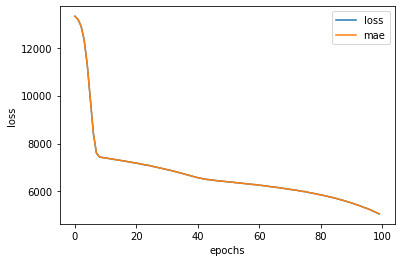

In [102]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [103]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [104]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3497.7625 - mae: 3497.7625


(3497.762451171875, 3497.762451171875)

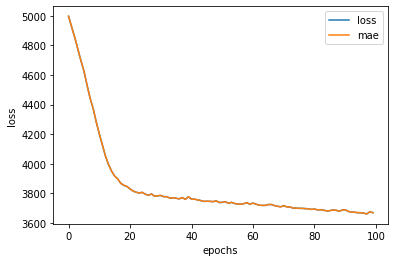

In [105]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

### Preprocessing data (normalization and standardization)

In [106]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# Read in the insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [108]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [110]:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [111]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [112]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [113]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [114]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = Sequential([
  Dense(100),
  Dense(10),
  Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [115]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3167.9529 - mae: 3167.9529


In [116]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3497.762451171875, 3167.952880859375)